## Importing libraries

In [63]:
from spacy.lang.en import English
import csv as csv
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split as split
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

## Reading and splitting

In [64]:
nlp = English()
all_labels = []
all_tweets = []

In [65]:
with open("offenseval-training-v1.tsv", encoding='utf8') as mf:
    reader = csv.reader(mf, delimiter="\t")
    for id,tweet,a,b,c in tqdm(reader,'Reading data'):
        if id == "id":
            continue
        all_tweets.append(tweet.lower())
        if a == "OFF":
            all_labels.append(1)
        else:
            all_labels.append(0)

Reading data: 13241it [00:00, 251355.65it/s]


In [66]:
print(all_tweets[0])
#print(all_labels[3])

@user she should ask a few native americans what their take on this is.


In [67]:
tr_tweets,tst_tweets,tr_labels,tst_labels = split(all_tweets,all_labels,test_size=0.3)

### Preprocessing

In [86]:
prep_tr_tweets = []
prep_tst_tweets = []
tr_vecs = []
tst_vecs = []

In [87]:
for i, tweet in tqdm(enumerate(tr_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    words = []
    for j, token in enumerate(temp):
        words.append((token.lemma_))
    prep_tr_tweets.append(words)
for i, tweet in tqdm(enumerate(tst_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    asd = []
    for j, token in enumerate(temp):
        asd.append((token.lemma_))
    prep_tst_tweets.append(asd)

Token and Lemmatization: 9268it [00:00, 10671.81it/s]
Token and Lemmatization: 3972it [00:00, 8457.68it/s]


In [94]:
len(tr_vecs[0][1])

12567

## Vectorizing

In [89]:
vectorizer = CountVectorizer()
data =[' '.join(tweet) for tweet in prep_tr_tweets]
vectorizer = vectorizer.fit(data)
vectors = vectorizer.transform(data).toarray()
tr_vecs.append(vectors)

In [90]:
data2 =[' '.join(tweet) for tweet in prep_tst_tweets]
vectors = vectorizer.transform(data2).toarray()
tst_vecs.append(vectors)

In [55]:
len(tst_vecs[0])

3972

## Classifiers

In [95]:
classifier = RandomForestClassifier
params = {'n_estimators':30}
model = classifier(**params)
model.fit(tr_vecs[0],tr_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
def confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

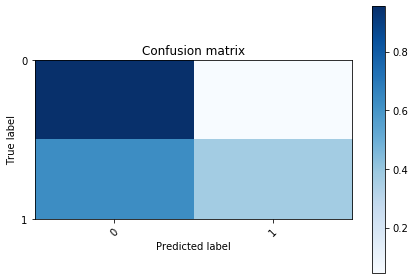

In [97]:
test_data = np.array(tst_vecs[0])
test_labels = np.array(tst_labels).reshape(-1,1)
predicted_tst_labels = model.predict(test_data)
conf = np.zeros([2,2])
confnorm = np.zeros([2,2])
for i in range(0,test_data.shape[0]):
    j = test_labels[i,:]
    k = predicted_tst_labels[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0,2):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
confusion_matrix(confnorm, labels=[i for i in range(2)])
acc = model.score(test_data,test_labels)

In [98]:
print(acc)

0.7557905337361531


In [46]:
all_token_text = []
all_token_lemma = []
other_stopwords = ['.',',',':','#','-','"','!','?','*','&','@','˝',')','(',';','´',' ','/']
all_token_cleaned = []